**EELs project: Phase 3**

Determine redshift ranges that lead to an improved BAO signal and declare those sets of EELs our “Platinum sample”.  

As a start, we look at whether EELs provide shot-noise-limited measurements of galaxy clustering or not.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os
from collections import OrderedDict

**Theory power spectra from Hu Zhan**

$C_\ell$ and surface number density predictions for five redshift bins (0.15<z<0.37, 0.37<z<0.66, 0.66<z<1.0, 1.0<z<1.5, 1.5<z<2.0) for three magnitude cuts (r<25.6, 26.8, 27.5). These are different than the mag cuts used in the paper (r<24.0, 25.6, 27.5).

**Mag cut to look at?**

Assuming average galaxy colors, u - g = g - r = r - i = i - z = 0.4, we have i = r-0.4 => r = 0.8+z

Since we have z=26.2 (based on Lana's poster), we should look around r=27.0.

We have data for r<26.8, 27.5. Lets look at 26.8 for now.

**Redshift bins to look at?**

Based on Lana's poster, we have EELs at refshift 1.33, 0.74, 0.33

So, using Hu's bins, we can consider: 0.15<z<0.37, 0.66<z<1.0, 1.0<z<1.5

In [2]:
bao_data_path = '/global/homes/a/awan/LSST/mock_data/HuData_Feb19' #HuData_April16'
os.listdir(bao_data_path)

['cls015-200z_r27.5.txt',
 'cls015-200z_r26.8.bins',
 'cls015-200z_r27.5.bins',
 'cls015-200z_r25.6.bins',
 'cls015-200z_r25.6.txt',
 'cls015-200z_r26.8.txt']

In [3]:
ell = OrderedDict()
wBAO_cls = OrderedDict()
surfNumDensity = OrderedDict()
shot_noise = OrderedDict()

for file in [f for f in os.listdir(bao_data_path) if f.__contains__('26.8')]:
    print('Reading %s'%file)
    mag_key = file.split('_')[-1]
    if file.__contains__('bins'):
        mag_key = mag_key.split('.bins')[0]
    else:
        mag_key = mag_key.split('.txt')[0]
    mag_key = mag_key.split('r')[1]
    print(mag_key)
    
    # read in the data into usable structures
    if mag_key not in ell:
        ell[mag_key] = []
        wBAO_cls[mag_key] = OrderedDict()
        wBAO_cls[mag_key]['0.15<z<0.37'] = []
        wBAO_cls[mag_key]['0.37<z<0.66'] = []
        wBAO_cls[mag_key]['0.66<z<1.0'] = []
        wBAO_cls[mag_key]['1.0<z<1.5'] = []
        wBAO_cls[mag_key]['1.5<z<2.0'] = []

        surfNumDensity[mag_key] = OrderedDict()
        shot_noise[mag_key] = OrderedDict()
        
    if file.__contains__('bins'):
        shot_noise_data = np.genfromtxt('%s/%s'%(bao_data_path, file))    # last column is the surface number density of each bin in 1/(sq arcmin)
        for j, key in enumerate(wBAO_cls[mag_key].keys()): #range(0,5):
            surfNumDensity[mag_key][key] = shot_noise_data[j][5]*1.18*10**7   # convert from 1/sq arcmin to 1/Sr
            shot_noise[mag_key][key] = 1/surfNumDensity[mag_key][key]       
    else:
        bao_data = np.genfromtxt('%s/%s'%(bao_data_path, file))
        
        for i in range(len(bao_data)):
            ell[mag_key].append(bao_data[i][0])        
            wBAO_cls[mag_key]['0.15<z<0.37'].append(bao_data[i][1])
            wBAO_cls[mag_key]['0.37<z<0.66'].append(bao_data[i][3])
            wBAO_cls[mag_key]['0.66<z<1.0'].append(bao_data[i][5])
            wBAO_cls[mag_key]['1.0<z<1.5'].append(bao_data[i][7])
            wBAO_cls[mag_key]['1.5<z<2.0'].append(bao_data[i][9])

ell[mag_key] = np.array(ell[mag_key])

Reading cls015-200z_r26.8.bins
26.8
Reading cls015-200z_r26.8.txt
26.8


In [4]:
# Drop the non-useable bins
wanted = ['0.15<z<0.37', '0.66<z<1.0', '1.0<z<1.5']

unwanted = [f for f in wBAO_cls[mag_key].keys() if f not in wanted]
print(unwanted)

for mag_key in wBAO_cls:
    for z_key in unwanted:
        wBAO_cls[mag_key].pop(z_key)
        shot_noise[mag_key].pop(z_key)     

['0.37<z<0.66', '1.5<z<2.0']


In [5]:
shot_noise

OrderedDict([('26.8',
              OrderedDict([('0.15<z<0.37', 1.8950809382818345e-08),
                           ('0.66<z<1.0', 7.219397850614942e-09),
                           ('1.0<z<1.5', 9.6579584705285171e-09)]))])

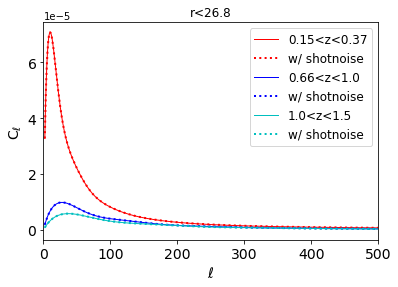

In [6]:
# set up for plots
fontsize = 14

plotcolor={}
plotcolor['0.15<z<0.37']= 'r'
plotcolor['0.37<z<0.66']= 'g'
plotcolor['0.66<z<1.0']= 'b'
plotcolor['1.0<z<1.5']= 'c'
plotcolor['1.5<z<2.0']= 'k'

# plot C_ell. with and without the shot noise.

for mag_key in wBAO_cls:
    plt.clf()
    for z_key in wBAO_cls[mag_key]:
        plt.plot(ell[mag_key], wBAO_cls[mag_key][z_key], label=z_key, color=plotcolor[z_key], lw=1)
        plt.plot(ell[mag_key], wBAO_cls[mag_key][z_key] + shot_noise[mag_key][z_key],
                 color=plotcolor[z_key], linestyle=':', lw=2, label='w/ shotnoise')
        
    plt.title('r<%s'%mag_key)
    plt.legend(loc=0, fontsize=fontsize-2)
    plt.xlim(0,500)
    plt.xlabel('$\ell$', fontsize=fontsize)
    plt.ylabel('C$_\ell$',  fontsize=fontsize)
    plt.tick_params(axis='x', labelsize=fontsize)
    plt.tick_params(axis='y', labelsize=fontsize)

    plt.gca().ticklabel_format(style='sci',scilimits=(-3,4),axis='y')
    plt.show()

**Some Theory**

Expected power spectrum: 

$\left<C_\ell\right>= C_{\ell, LSS}+\frac{1}{\eta}$ where $\eta$ is the surface number density per Sr.

Minimum variance is given by

$(\Delta C_\ell)^2 = \frac{2}{2\ell+1} \left<C_\ell\right>^2$

In [7]:
fsky = 0.394568125407  #  based on RandomFPV i band completeness map after 10yrs

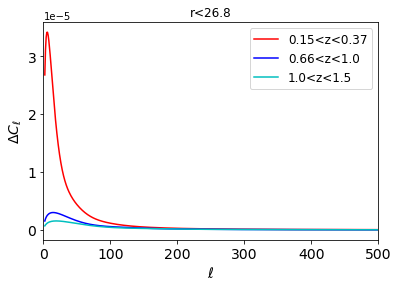

In [8]:
for mag_key in wBAO_cls:
    plt.clf()
    for z_key in wBAO_cls[mag_key]:
        expected_cl = wBAO_cls[mag_key][z_key] + shot_noise[mag_key][z_key]
        min_var = np.sqrt(2/(ell[mag_key]+1.))*expected_cl
        
        plt.plot(ell[mag_key], min_var, color=plotcolor[z_key], label=z_key, )
        
    plt.title('r<%s'%mag_key)
    plt.legend(loc=0, fontsize=fontsize-2)
    plt.xlim(0,500)
    plt.xlabel('$\ell$', fontsize=fontsize)
    plt.ylabel('$\Delta C_\ell$',  fontsize=fontsize)
    plt.tick_params(axis='x', labelsize=fontsize)
    plt.tick_params(axis='y', labelsize=fontsize)

    plt.gca().ticklabel_format(style='sci',scilimits=(-3,4),axis='y')
    plt.show()

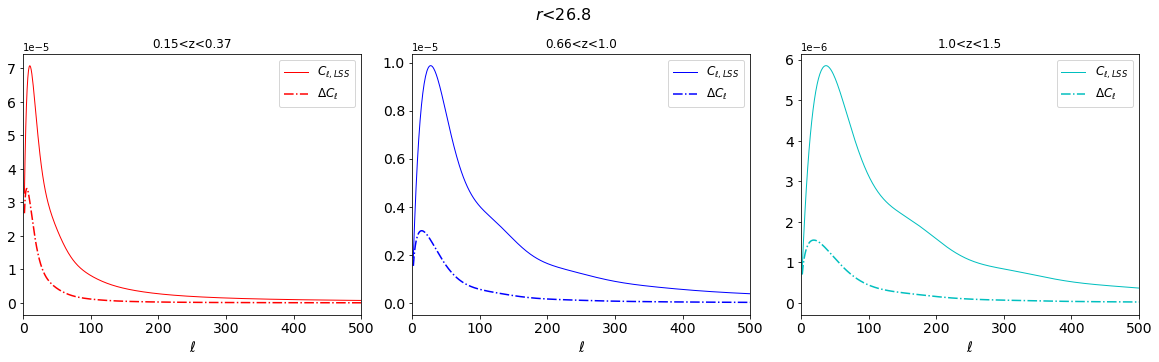

In [9]:
# combine stuff
for mag_key in wBAO_cls:
    fig, axes = plt.subplots(nrows=1, ncols=3)
    fig.subplots_adjust(top=0.85, wspace=0.15)
    
    for i, z_key in enumerate(wBAO_cls[mag_key]):
        axes[i].plot(ell[mag_key], wBAO_cls[mag_key][z_key], lw=1,
                     label='$C_{\ell, LSS}$', color=plotcolor[z_key])
        
        expected_cl = wBAO_cls[mag_key][z_key] + shot_noise[mag_key][z_key]
        #axes[i].plot(ell[mag_key], expected_cl, linestyle=':', lw=2, label='$<C_{\ell}>$', color=plotcolor[z_key])
        
        min_var = np.sqrt(2/(ell[mag_key]+1.))*expected_cl
        
        axes[i].plot(ell[mag_key], min_var, color=plotcolor[z_key], label= '$\Delta C_{\ell}$', linestyle = '-.')
        
        axes[i].set_title('%s'%(z_key), fontsize=fontsize-2)
        axes[i].legend(loc=0, fontsize=fontsize-2)
        axes[i].set_xlim(0,500)
        axes[i].set_xlabel('$\ell$', fontsize=fontsize)
        axes[i].tick_params(axis='x', labelsize=fontsize)
        axes[i].tick_params(axis='y', labelsize=fontsize)
        axes[i].ticklabel_format(style='sci',scilimits=(-3,4),axis='y')
    
    fig = plt.gcf()
    fig.set_size_inches(20, 5)
    
    plt.suptitle('$r$<%s'%(mag_key), fontsize=fontsize+2)
    plt.show()

**Look at $\ell$=200 only**

In [10]:
# markdown output for continuum sample: del_z is just the difference betewen bin edges
wanted_ells = [200.]
for mag_key in wBAO_cls:
    for z_key in wBAO_cls[mag_key]:
        print('\n| . | %s | . | . '%z_key)
        print(' -------- | -------- | -------- | --------')
        expected_cl = np.array(wBAO_cls[mag_key][z_key]) + shot_noise[mag_key][z_key]
        min_var = np.sqrt(2/(ell[mag_key]+1.))*expected_cl
        
        print(r'| $\Delta z$ | $C_{\ell, LSS}$ | $1/\eta$ | $\Delta C_\ell$')
        #print(' -------- | -------- | -------- | --------')
        for l in wanted_ells:
            p = ''
            ind = np.where(ell[mag_key]==l)[0][0]
            #print(ind)
            #p += '%.f'%l 
            p += 'Continuum selected '
            split = z_key.split('<')
            p += '| %.2f '%(float(split[-1])-float(split[0]))
            p += '| %.2e '%wBAO_cls[mag_key][z_key][ind]
            #p += '| %.2e'%expected_cl[ind]
            p += '| %.2e '%shot_noise[mag_key][z_key]
            p += '| %.2e '%min_var[ind]
            print(p)


| . | 0.15<z<0.37 | . | . 
 -------- | -------- | -------- | --------
| $\Delta z$ | $C_{\ell, LSS}$ | $1/\eta$ | $\Delta C_\ell$
Continuum selected | 0.22 | 2.74e-06 | 1.90e-08 | 2.75e-07 

| . | 0.66<z<1.0 | . | . 
 -------- | -------- | -------- | --------
| $\Delta z$ | $C_{\ell, LSS}$ | $1/\eta$ | $\Delta C_\ell$
Continuum selected | 0.34 | 1.64e-06 | 7.22e-09 | 1.64e-07 

| . | 1.0<z<1.5 | . | . 
 -------- | -------- | -------- | --------
| $\Delta z$ | $C_{\ell, LSS}$ | $1/\eta$ | $\Delta C_\ell$
Continuum selected | 0.50 | 1.58e-06 | 9.66e-09 | 1.59e-07 


**Estimate EELs-shotnoise based on the surface number densities from Lana:**

OII: z=1.33: $\eta$= 3994020.41058, $\Delta z$= 0.2742

OIII: z=0.74:  $\eta$=  4817077.43893, $\Delta z$= 0.2041

Halpha: z=0.33:  $\eta$=  8933569.52924, $\Delta z$= 0.1557

Assume  C$_{\ell,LSS}$ is by $\Delta z_{continuum}/\Delta z_{EEL}$ to account for redshift uncertainty.



In [11]:
shotnoise_EELs = {}
shotnoise_EELs['[OII]'], shotnoise_EELs['[OIII]'], shotnoise_EELs['H$\alpha$']= 1/3994020.41058, 1/4817077.43893, 1/8933569.52924

delz_EEL= {}
delz_EEL['[OII]'], delz_EEL['[OIII]'], delz_EEL['H$\alpha$'] = 0.2742, 0.2041, 0.1557

# markdown output for EELs
for eelKey in shotnoise_EELs:
    if eelKey=='[OII]': z_key = '1.0<z<1.5'
    if eelKey=='[OIII]': z_key = '0.66<z<1.0'
    if eelKey.__contains__('H'): z_key = '0.15<z<0.37'
    print('| . | %s | . | .'%z_key)
    
    split = z_key.split('<')
    delz_cont = (float(split[-1])-float(split[0]))
    
    print('delz_cont/delz_eel: ', delz_cont/delz_EEL[eelKey])
    
    cl_lss = (delz_cont/delz_EEL[eelKey])*np.array(wBAO_cls[mag_key][z_key])
    expected_cl = cl_lss + shotnoise_EELs[eelKey]
    min_var = np.sqrt(2/(ell[mag_key]+1.))*expected_cl
        
    for l in wanted_ells:
        p = ''
        ind = np.where(ell[mag_key]==l)[0][0]
        p += '%s '%eelKey
        p += '| %.2f '%delz_EEL[eelKey]
        p += '| %.2e '%cl_lss[ind]
        p += '| %.2e '%shotnoise_EELs[eelKey]
        p += '| %.2e \n'%min_var[ind]
        print(p)

| . | 1.0<z<1.5 | . | .
delz_cont/delz_eel:  1.8234865061998542
[OII] | 0.27 | 2.88e-06 | 2.50e-07 | 3.13e-07 

| . | 0.66<z<1.0 | . | .
delz_cont/delz_eel:  1.6658500734933854
[OIII] | 0.20 | 2.73e-06 | 2.08e-07 | 2.93e-07 

| . | 0.15<z<0.37 | . | .
delz_cont/delz_eel:  1.4129736673089275
H$lpha$ | 0.16 | 3.87e-06 | 1.12e-07 | 3.98e-07 



**Combine markdown outputs**

| . | 0.15<z<0.37 | . | . 
 -------- | -------- | -------- | --------
| $\Delta z$ | $C_{\ell, LSS}$ | $1/\eta$ | $\Delta C_\ell$
Continuum selected | 0.22 | 2.74e-06 | 1.90e-08 | 2.75e-07 
H$\alpha$ | 0.16 | 3.87e-06 | 1.12e-07 | 3.98e-07 

| . | 0.66<z<1.0 | . | . 
 -------- | -------- | -------- | --------
| $\Delta z$ | $C_{\ell, LSS}$ | $1/\eta$ | $\Delta C_\ell$
Continuum selected | 0.34 | 1.64e-06 | 7.22e-09 | 1.64e-07 
[OIII] | 0.20 | 2.73e-06 | 2.08e-07 | 2.93e-07 

| . | 1.0<z<1.5 | . | . 
 -------- | -------- | -------- | --------
| $\Delta z$ | $C_{\ell, LSS}$ | $1/\eta$ | $\Delta C_\ell$
Continuum selected | 0.50 | 1.58e-06 | 9.66e-09 | 1.59e-07 
[OII] | 0.27 | 2.88e-06 | 2.50e-07 | 3.13e-07 